# Naive Bayes

簡單貝氏是監督學習 （supervised learning） <br>

我們前面提過 貝氏定理 （Bayes’ theorem）， 假設 $A = L$ 是某件要預測的事件，$B = {\rm features}$ 是觀察到的特徵。

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

簡單貝氏有拿來處理文本分類問題，我們就實際拿一個例子來說明，假設 $A$ 是要判斷這個文章是不是垃圾郵件、或是不是愛情小說，
$B$ 就是我們觀察裡面有沒有出現某些字串， 像是 "現在下單"，"買一送一"，"你還在等什麼"，"壁東"，"霸總"，"富公子"，等等特徵，然後用他來預測這文章是垃圾郵件的機率、或是愛情小說的機率。 <br>

那如果我們有兩個事件 $L_1$，$L_2$ 在相同特徵下，要比較他們可能的機率

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

我們會發現原來我們所要知道的是在不同特徵底下各事件分別會發生的機率 $P({\rm features}~|~L_i)$，他也被稱為 *generative model* ，
所以你會知道為何有人在做文本分類時會去統計不同字串的出現機率與 TF-IDF 等等的特徵，
我們很自然的會想建立一般模型，再根據這次文章看到的特徵去推論他可能是什麼文章，Naive Bayes 的 Naive 天真想法由此而來。



# Gaussian Naive Bayes

現在換回我們的符號，假設有資料 $X$ 答案 $y$ ，
我們想做的就是給定 $x_1,\cdots,x_n$ 會看到 $y$ 的機率，
根據貝氏定理我們可以知道

$$P(y｜x_1,\cdots,x_n) = \frac{P(y)P(x_1,\cdots,x_n｜y)}{P(x_1,\cdots,x_n)}$$

我們要求 *generative model* $P(x_1,\cdots,x_n｜y)$，我們簡單的假設 $x_1,\cdots,x_n$ 是互不相關的機率給他乘起來

$$P(x_1,\cdots,x_n｜y) = \prod_{i=1}^n P(x_i｜y)$$

因為分母 $P(x_1,\cdots,x_n)$ 是個常數，所以我們要預測的 

$$\hat{y} = \argmax_y P(y) \prod_{i=1}^n P(x_i｜y)$$

### $P(x_i | y)$

所以這個問題最後剩 $P(x_i｜y)$ 的值該怎麼估計，在 scikit learn 裡面去實做不同的簡單貝氏的方法，就是用不同的機率去估計  $P(x_i｜y)$。 <br>

我們現在用某個例子描述這個機率 $P(x_i｜y)$ ，假設我們在做文章的分類，那這時候 $y$ 是什麼， $y$ 就是某一類文章，假設 $y$ 是愛情小說，
那 $x_i$ 是什麼，是我們找的文章的特徵，可以是某些字出現的次數，那 $P(x_i｜y)$ 就是如果現在確定這一篇文章是愛情小說，那我看到的字串例如 "告白" 的次數的機率有多少。 <br>

這時候高斯 Gaussian 就出來說話啦，你為什麼不用高斯分布阿

$$P(x_i｜y) =  \frac{1}{ \sigma_y \sqrt{2 \pi}} \exp \Big ( -\frac{1}{2} (\frac{x_i - \mu_y}{\sigma_y})^2 \Big )$$

我們假設要收集好多類的文章，我們必須一類一類的分別來做，假設就是先分辨愛情這一類，我們可以依據每一項特徵分別來看，假設我們先看 “告白” 這個字串出現的次數，
那我們在收集到的 6 篇有關愛情的文章中去計算裡面出現 "告白" 次數的 mean $\mu_y$ 跟 variance $\sigma_y$， 
有了這些數據以後，再去檢視新的一篇文章，我們就能根據這些特徵去分類這一篇新的文章，因而得到這是屬於哪類文章的結論。 <br>

下面進入實戰環節。




In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))



Training accuracy:  0.95
Testing accuracy:  1.0


下面我們畫圖感受一下 Gaussian Naive Bayes，[參考](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=ineHR5qim-Fs)。


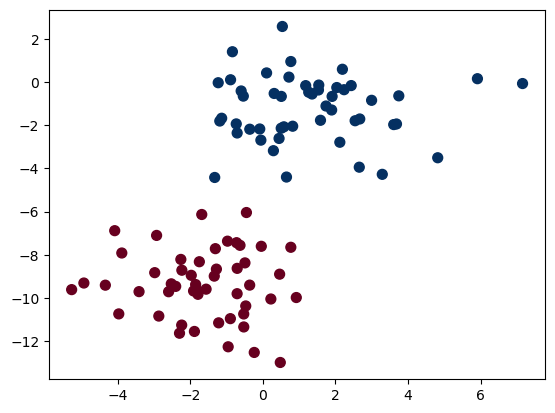

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')


[(-8.0, 8.0), (-15.0, 5.0)]

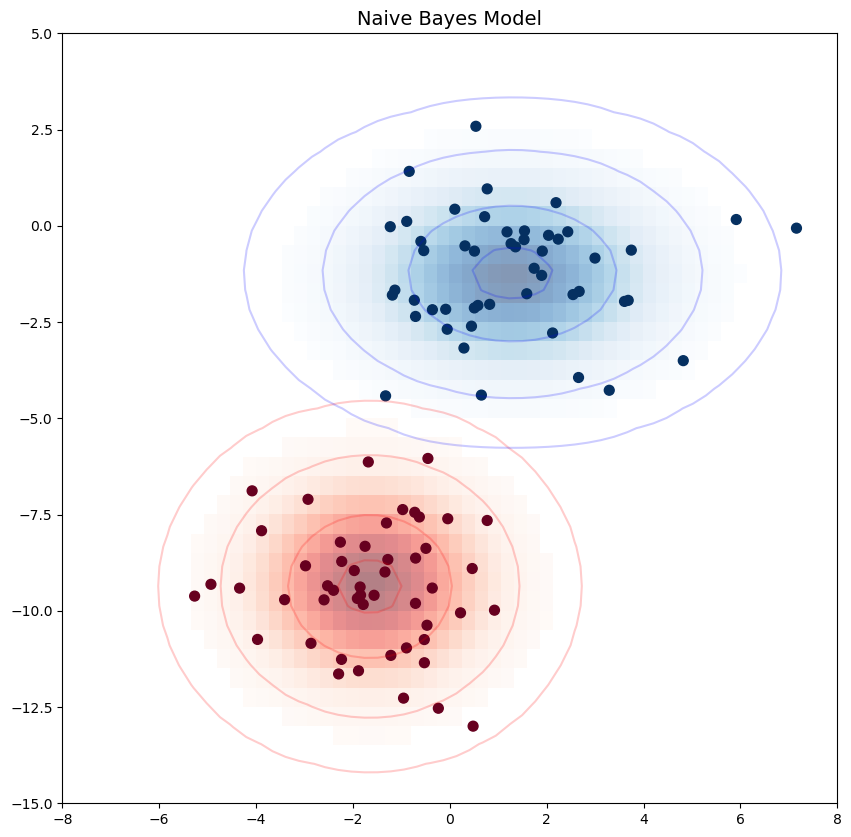

In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

# Multinomial Naive Bayes

根據上面我們已經知道的重點，只在怎麼估計機率 $P(x_i|y)$ ，
另一個很直覺的估計方法是

$$
P(x_i|y) = \frac{N_{y,i}}{N_{y}},\\
N_{y,i} = \sum_{x \in T} x_i, N_{y} = \sum_{i=1}^n N_{y,i}
$$

其中 $T$ 是訓練資料. <br>

我們下面用某個例子來看 $N_{y,i}$ ，等於是在我們收集的所有文章裡面，先把愛情相關的文章拿出來，再去統計其中某一類特徵，假設就是 "告白" 這個字串出現的次數，再把他全部加起來，
$N_{y}$ 就是把所有我們會考慮的特徵都加起來，像是 打打殺殺、槍砲、恐龍、九大魔王、等等我們要考慮的特徵通通去做統計，那我們很直覺的一個想法就是根據我們取的那些關鍵字，
是愛情的文章他出現的機率分布應該會很像吧 $P(x_i|y)$ 如果我們收集的文章夠多的話。 <br>

但是天下文章那麼多，我們絕不可能收集到足夠的多，為了避免我們文章出現機率為 0 的問題，所以我們需要修正一下估計

$$
P(x_i|y) = \frac{N_{y,i} + \alpha}{N_{y} + \alpha n}
$$

其中 $\alpha  \geq 0$，如果 $\alpha = 1$ 被稱為 Laplace smoothing

我們下面來看看不同 $\alpha$ 的效果。


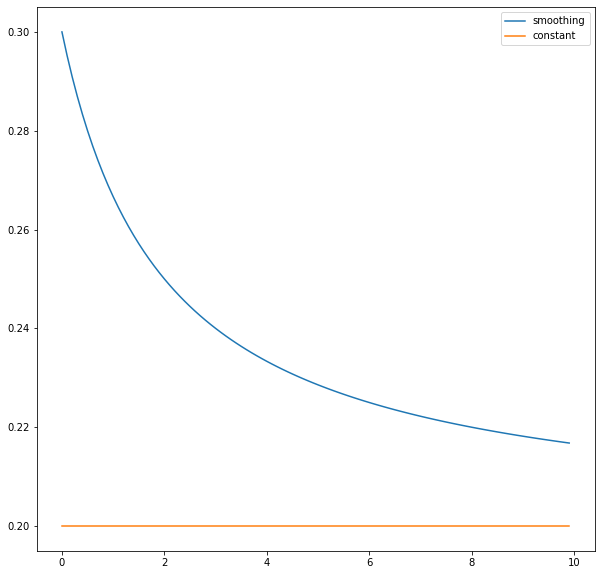

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

a = np.arange(0, 10, 0.1) 
y = (3 + a)/(10 + a*5)
z = 0*a + 1/5

plt.plot(a, y, label='smoothing')
plt.plot(a, z, label='constant')
plt.legend()
plt.show()



下面進入實戰

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

classifier = MultinomialNB(alpha = 0.5)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  0.9583333333333334
Testing accuracy:  0.9666666666666667


In [31]:
??MultinomialNB

Init signature: MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
Source:        
class MultinomialNB(_BaseDiscreteNB):
    """
    Naive Bayes classifier for multinomial models.

    The multinomial Naive Bayes classifier is suitable for classification with
    discrete features (e.g., word counts for text classification). The
    multinomial distribution normally requires integer feature counts. However,
    in practice, fractional counts such as tf-idf may also work.

    Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

    Parameters
    ----------
    alpha : float, default=1.0
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).

    fit_prior : bool, default=True
        Whether to learn class prior probabilities or not.
        If false, a uniform prior will be used.

    class_prior : array-like of shape (n_classes,), default=None
        Prior probabilities of the classes. If specified the priors are not
        adjus

# Bernoulli Naive Bayes

下面再提一個用法，Bernoulli Naive Bayes，我們引用 scikit learn 裡面的用法。

> Like MultinomialNB, this classifier is suitable for discrete data. The
> difference is that while MultinomialNB works with occurrence counts,
> BernoulliNB is designed for binary/boolean features.

我們可以看到他跟 MultinomialNB 差不多只不過他只能用 binary/boolean 特徵。



In [35]:
??BernoulliNB

Init signature: BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
Source:        
class BernoulliNB(_BaseDiscreteNB):
    """Naive Bayes classifier for multivariate Bernoulli models.

    Like MultinomialNB, this classifier is suitable for discrete data. The
    difference is that while MultinomialNB works with occurrence counts,
    BernoulliNB is designed for binary/boolean features.

    Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.

    Parameters
    ----------
    alpha : float, default=1.0
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).

    binarize : float or None, default=0.0
        Threshold for binarizing (mapping to booleans) of sample features.
        If None, input is presumed to already consist of binary vectors.

    fit_prior : bool, default=True
        Whether to learn class prior probabilities or not.
        If false, a uniform prior will be used.

    class_prior : array-like of shape (

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

classifier = BernoulliNB(alpha = 0.5)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  0.35
Testing accuracy:  0.26666666666666666


除此之外，scikit learn 還提供 CategoricalNB 跟 ComplementNB 就留給大家測試。 <br>

我們下面要示範 ``文章分類`` 的用法，以scikit learn 提供的 ``fetch_20newsgroups`` 為例。


In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

我們下面只會挑 5 類來做分類。

In [10]:
categories = ['alt.atheism', 
                'comp.sys.ibm.pc.hardware',
                'rec.motorcycles',
                'sci.space', 
                'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


我們可以看一下裡面的文章。

In [3]:
print(train.data[5])

From: maxg@microsoft.com (Max Gilpin)
Subject: HONDA CBR600 For Sale
Organization: Microsoft Corp.
Keywords: CBR Hurricane 
Distribution: usa
Lines: 8

For Sale 1988 Honda CBR600 (Hurricane).  I bought the bike at the end of
last summer and although I love it, the bills are forcing me to part with
it.  The bike has a little more than 6000 miles on it and runs very strong.
It is in nead of a tune-up and possibly break pads but the rubber is good.
I am also tossing in a TankBag and a KIWI Helmet.  Asking $3000.00 or best
offer.  Add hits newspaper 04-20-93 and Micronews 04-23-93.  Interested 
parties can call 206-635-2006 during the day and 889-1510 in the evenings
no later than 11:00PM.  



我們會用 [TF-IDF](https://zh.m.wikipedia.org/zh-tw/Tf-idf) 特徵。


## Term Frequency - Inverse Document Frequency

他是由兩個部分組成詞頻（term frequecny, tf）與逆向文件頻率（inverse document frequency, idf）


### Term Frequency

$$
tf(t,d) = \frac{f_{t,d}}{ \sum_{t' \in d} f_{t',d}}
$$

上面的 $f_{t,d}$ 表示單詞 $t$ 在文件 $d$ 當中的次數，我們可以由公式看出來詞頻就是單詞出現在一份文件的頻率。


### Inverse Document Frequency

$$
idf(t,D) = \ln \Big ( \frac{｜D｜}{ 1 + ｜\{ d \in D : t \in d \}｜} \Big )
$$

上面 $D$ 表示語料庫，其元素為文件 $d$，由上面公式可以知道，若某個單詞愈是集中出現在某幾份文件中，則 idf 就愈大，其之於整個語料庫而言就愈重要。
反之，當某個單詞在大量文件中都出現，idf 就愈小，我們會認為這個單詞愈是一般。



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train.data)
y_train = train.target

X_test = vectorizer.transform(test.data)
y_test = test.target

classifier = MultinomialNB(alpha = 0.8)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))

y_pred = classifier.predict(X_test)


Training accuracy:  0.9936731107205624
Testing accuracy:  0.9402748414376322


我們來看看我們答對那些。

Text(161.97222222222223, 0.5, 'predicted label')

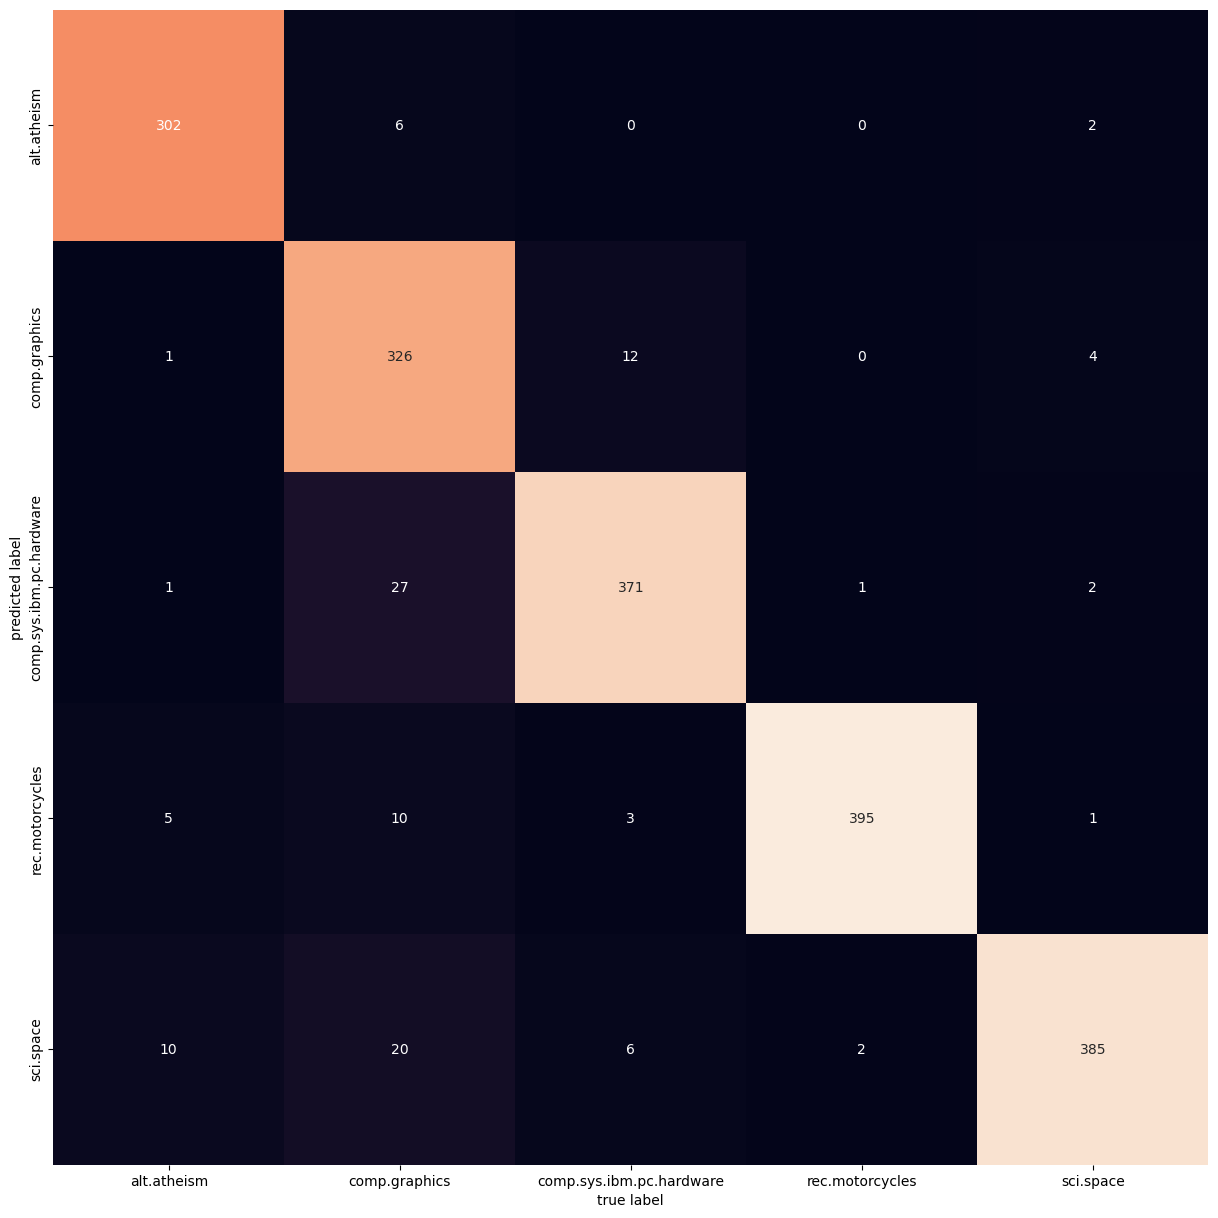

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 15]

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
